/tmp/ipykernel_16772/94941359.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_washington = df_washington.groupby(["Year"]).sum()
/tmp/ipykernel_16772/94941359.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum()


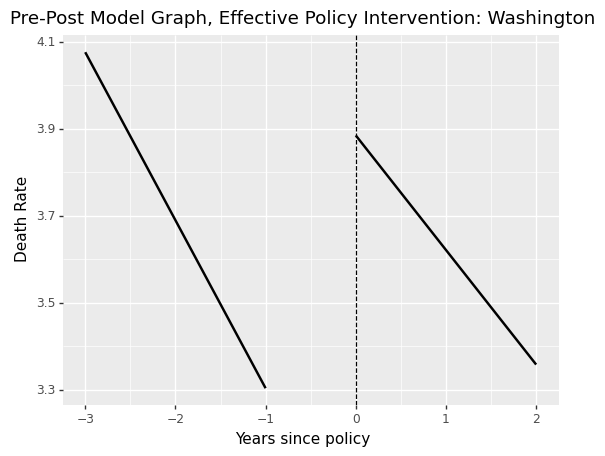

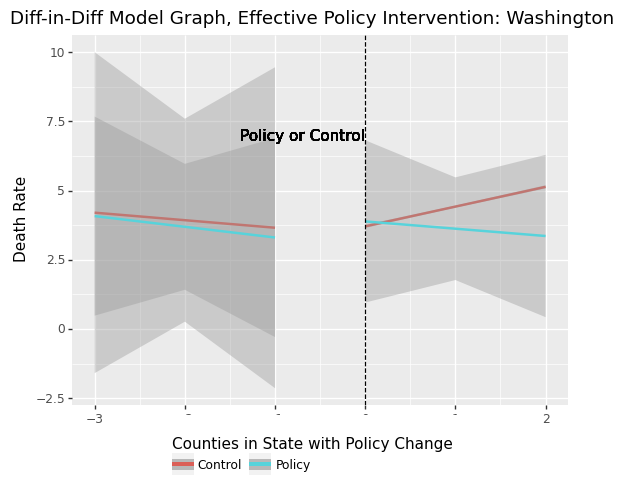

Bad pipe message: %s [b'\xbd\xba\x05\x8b\xcf\x86\xd8#\xcd\xfe\x9b(\x87\x96!U:\xe5 z\xca\x83\xe1 \x7f\r\x04\x0e\x84l-\x0b6B\xe7~S\x15n\x8b@\x04 \xe9\xfc\x17~\xbc\xd7V\x08\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 ;\xda4\xf6\xcd\x9d\x0f\r$\xea?;\x7f\x9a\xe4\xe4\xce\xf0\x89h\x0b\xd4']
Bad pipe message: %s [b'\x86\x03\xe7@4\x00\xb7>\xe8A\x8c\xd7\xe2\x00\xaen\xab\x9f \x16\xb8\xf6\x04r\n\x9a \xd4\x02\xe4\x0e\x97\xbd>\x99\x7f8\xe9y\xc2fT\xc2\x16<\x0b\xdeJZ9\x02\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x

In [2]:
import pandas as pd
df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/vital_stats_WASHINGTON_merged.csv')
df.drop(['Crude Rate'], axis = 1)

we_want_washington = ['Alaska', 'Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
df_washington = df[df['State'].isin(we_want_washington)]

groupedby_df_washington = df_washington.groupby(["Year"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Death Rate'] = (groupedby_df_washington['Deaths']/groupedby_df_washington['Population'])*100_000

we_want_only_washington = ['Washington']
df_only_washington = df[df['State'].isin(we_want_only_washington)]

groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Death Rate'] = (groupedby_df_only_washington['Deaths']/groupedby_df_only_washington['Population'])*100_000


def label_row(row): 
    if row['Year'] == 2009:
        return -3
    if row['Year'] == 2010: 
        return -2
    if row['Year'] == 2011:
        return -1
    if row['Year'] == 2012: 
        return 0
    if row['Year'] == 2013: 
        return 1
    if row['Year'] == 2014: 
        return 2

groupedby_df_only_washington['Years since policy'] = groupedby_df_only_washington.apply (lambda row: label_row(row), axis = 1) 

groupedby_df_washington['Years since policy'] = groupedby_df_washington.apply (lambda row: label_row(row), axis = 1) 


from plotnine import *

g = (
    ggplot(groupedby_df_only_washington, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Washington")
)
#g.save("images/prepost_successful.pdf")
print(g)



groupedby_df_only_washington['Policy or Control'] = 'Policy'
groupedby_df_washington['Policy or Control'] = 'Control'

washington_policy_control = pd.concat([groupedby_df_washington, groupedby_df_only_washington])

h = (
    ggplot(
        washington_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Washington",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(h)